In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from alibi.explainers import IntegratedGradients
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import load_cats
from alibi.utils.visualization import visualize_image_attr

from tensorflow_model import load_image
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # True

TF version:  2.8.0
Eager execution enabled:  True


In [2]:
image_shape = (224, 224, 3)
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')
data = (data / 255).astype('float32')

Images shape: (4, 224, 224, 3)


In [6]:
data = load_image("dog.jpg").reshape(-1, 224, 224, 3)
data = (data / 255).astype('float32')

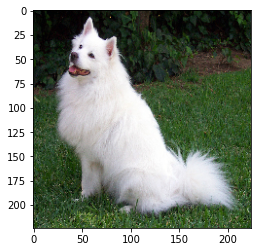

In [7]:
i = 0
plt.imshow(data[i]);

In [8]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [9]:
n_steps = 50
method = "gausslegendre"
internal_batch_size = 50
ig  = IntegratedGradients(model,
                          n_steps=n_steps,
                          method=method,
                          internal_batch_size=internal_batch_size)

In [10]:
instance = np.expand_dims(data[i], axis=0)
predictions = model(instance).numpy().argmax(axis=1)
explanation = ig.explain(instance,
                         baselines=None,
                         target=predictions)

In [11]:
# Metadata from the explanation object
explanation.meta

{'name': 'IntegratedGradients',
 'type': ['whitebox'],
 'explanations': ['local'],
 'params': {'target_fn': None,
  'method': 'gausslegendre',
  'n_steps': 50,
  'internal_batch_size': 50,
  'layer': 0},
 'version': '0.6.5'}

In [12]:
# Data fields from the explanation object
explanation.data.keys()

dict_keys(['attributions', 'X', 'forward_kwargs', 'baselines', 'predictions', 'deltas', 'target'])

In [13]:
# Get attributions values from the explanation object
attrs = explanation.attributions[0]

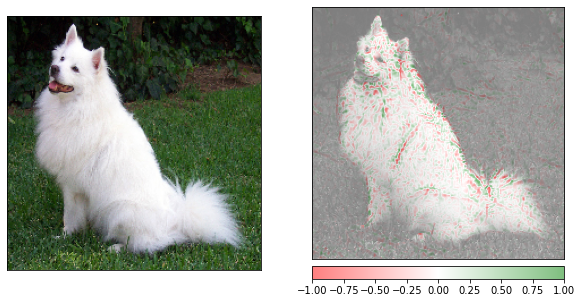

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=data[i], method='original_image',
                    title='', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=data[i], method='blended_heat_map',
                    sign='all', show_colorbar=True, title='',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);

In [19]:
fig.savefig("integrated_gradients_expl")